<a href="https://colab.research.google.com/github/xmendevs/Data-Deccoding/blob/main/HNG%20data%20Decode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase 1: The "Fingerprint" (Distributions)

>>> LOADING DATA...
Data loaded successfully.

>>> DATA VITALS:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2557 entries, 2018-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var3    2557 non-null   float64
 1   var1    2557 non-null   int64  
 2   var5    2557 non-null   int64  
 3   var2    2557 non-null   float64
 4   var4    2557 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 119.9 KB
None

>>> DESCRIPTIVE STATS:
              var3         var1         var5         var2         var4
count  2557.000000  2557.000000  2557.000000  2557.000000  2557.000000
mean      8.753109    86.349237    32.344153    -0.003625     0.021901
std       4.562154    36.286964     8.797210     0.370193     0.146388
min       0.000000     7.000000     2.000000    -0.730000     0.000000
25%       5.600000    70.000000    26.000000    -0.350000     0.000000
50%       9.000000    90.000000    32.000000  

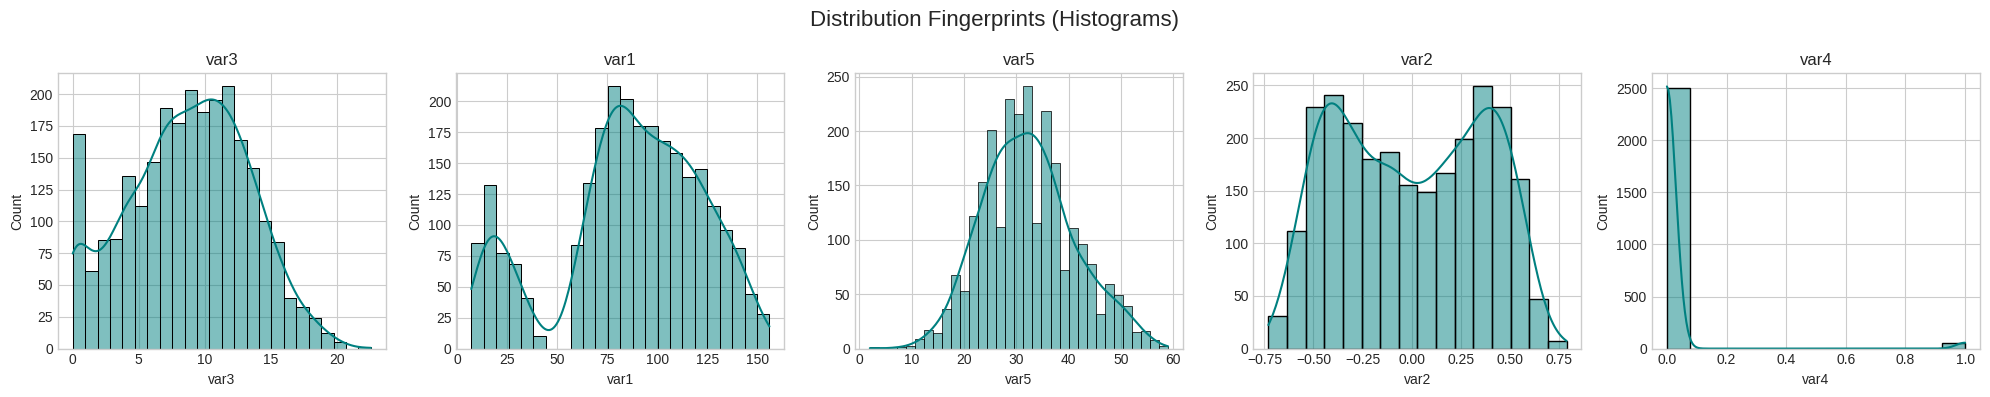


>>> EDA NOTES:
1. Var2 is likely Seasonality (low skew, periodic).
2. Var1 and Var5 are inversely related (Trade-off).
3. Var4 is a rare event (binary).


In [1]:
# IMPORTs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf

# Set visual style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

#  1. LOAD AND CLEAN
print(">>> LOADING DATA...")
try:
    df = pd.read_csv('missing_context_analysis_dataset.csv')
    # Convert date to datetime objects for time-series logic
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    print("Data loaded successfully.\n")
except FileNotFoundError:
    print("Error: File not found. Ensure the CSV is in the local directory.")

#  2. BASIC INSPECTION (The "Vitals")
print(">>> DATA VITALS:")
print(df.info())
print("\n>>> DESCRIPTIVE STATS:")
print(df.describe())

#  3. DISTRIBUTION ANALYSIS (The "Fingerprints")
# We look at histograms to see if variables are Normal (bell), Skewed (power law), or Uniform.
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Distribution Fingerprints (Histograms)', fontsize=16)

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'{col}')

    # Calculate moments
    sk = skew(df[col].dropna())
    kt = kurtosis(df[col].dropna())
    print(f"{col}: Skewness={sk:.2f} | Kurtosis={kt:.2f}")

plt.tight_layout()
plt.show()


print("\n>>> EDA NOTES:")
print("1. Var2 is likely Seasonality (low skew, periodic).")
print("2. Var1 and Var5 are inversely related (Trade-off).")
print("3. Var4 is a rare event (binary).")

###First, we determine what kind of data we are looking at. Is it human (noisy, skewed) or mechanical (regular, bounded)?

DISTRIBUTION FORENSICS
var3: Skew=-0.10 | Kurtosis=-0.59 | Binary? False
var1: Skew=-0.52 | Kurtosis=-0.41 | Binary? False
var5: Skew=0.28 | Kurtosis=-0.15 | Binary? False
var2: Skew=0.01 | Kurtosis=-1.29 | Binary? False
var4: Skew=6.53 | Kurtosis=40.68 | Binary? True


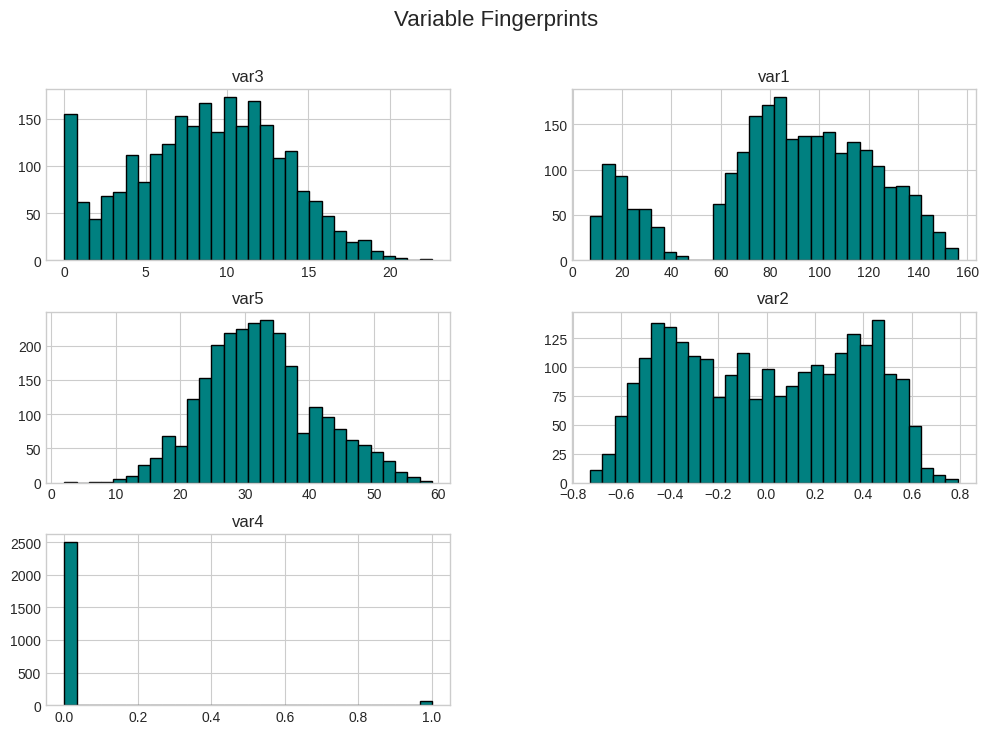

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 1. Load Data
df = pd.read_csv('missing_context_analysis_dataset.csv')

# 2. Fix Dates
# We convert the date column to a proper datetime object and make it the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# 3. forensic Distribution Check
# We loop through columns to calculate Skewness (lean) and Kurtosis (spikiness)
print("DISTRIBUTION FORENSICS")
for col in df.columns:
    sk = skew(df[col].dropna())
    kt = kurtosis(df[col].dropna())
    # Identify binary variables (if only 2 unique values exist)
    is_binary = df[col].nunique() == 2
    print(f"{col}: Skew={sk:.2f} | Kurtosis={kt:.2f} | Binary? {is_binary}")

# 4. Visual Inspection
df.hist(figsize=(12, 8), bins=30, color='teal', edgecolor='black')
plt.suptitle("Variable Fingerprints", fontsize=16)
plt.show()

###Phase 2: The "Heartbeat" (Time Structure)

#### Now i check how the system moves. Does it repeat?

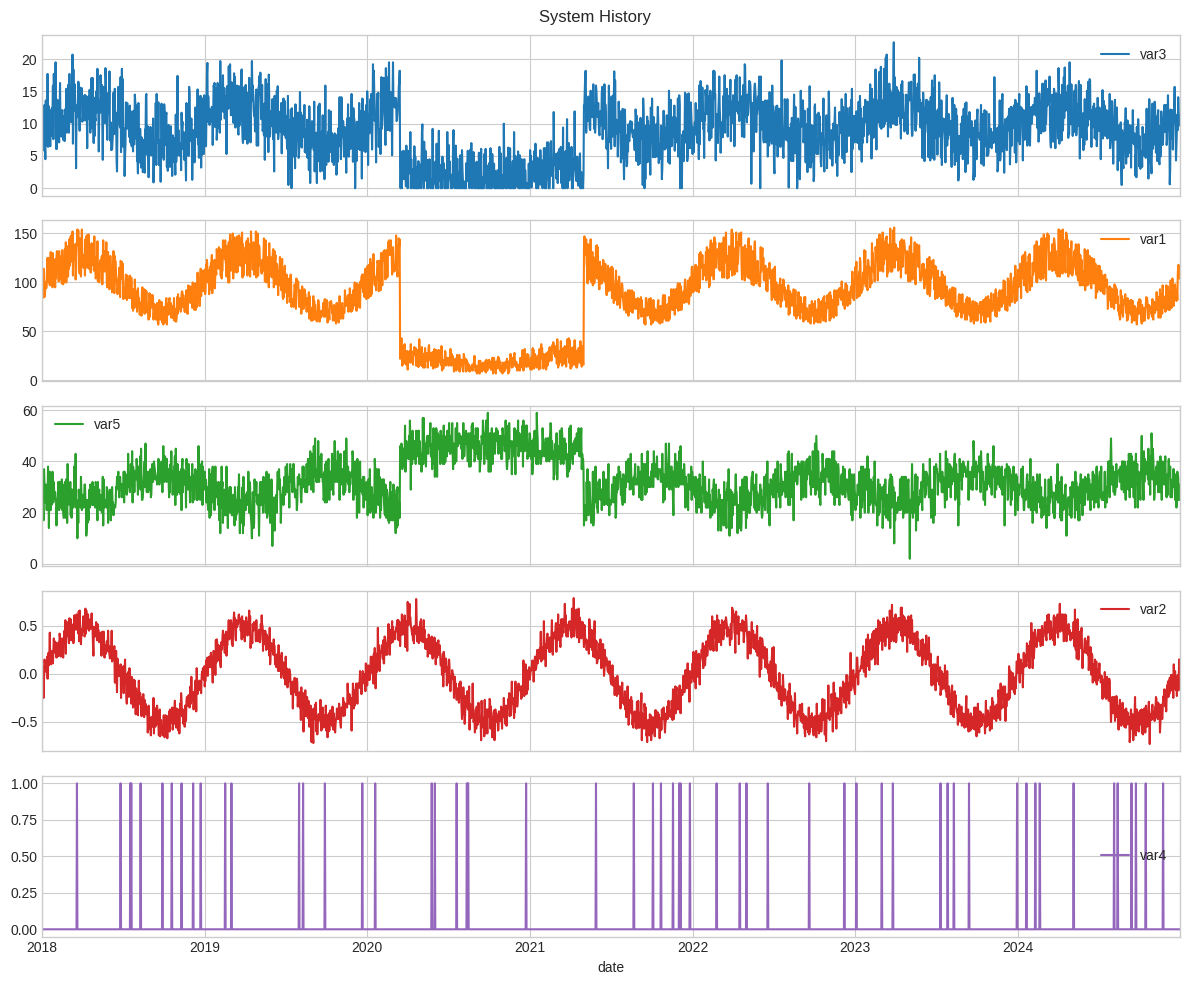

<Figure size 1000x400 with 0 Axes>

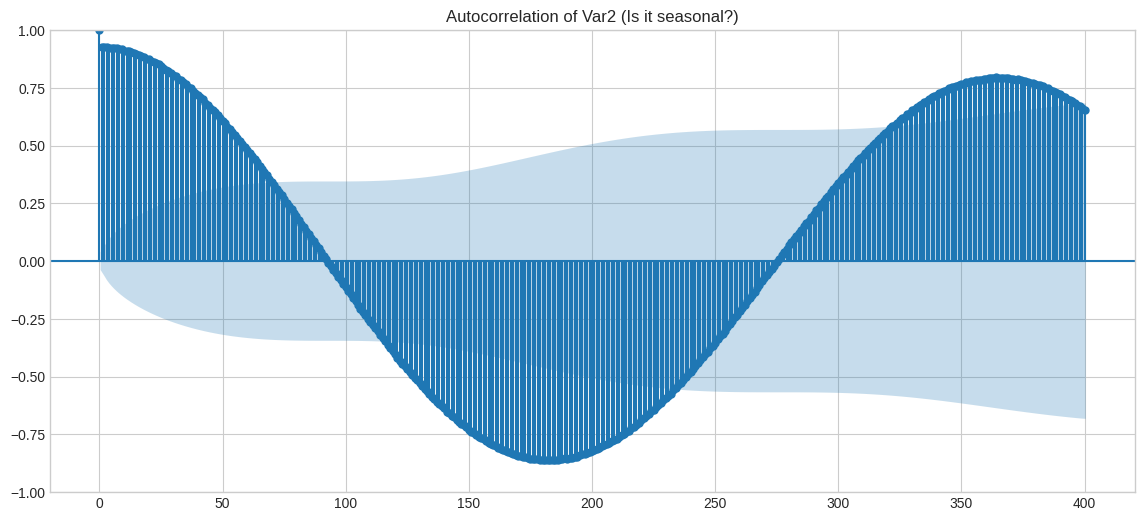

Annual Seasonality Score for Var2: 0.93 (1.0 is perfect cycle)


In [3]:
from statsmodels.graphics.tsaplots import plot_acf

# 1. Plot time series to see trends
df.plot(subplots=True, figsize=(12, 10), title="System History")
plt.tight_layout()
plt.show()

# 2. Check for Annual Cycles (365 days)
# We look at 'var2' specifically because it looked like a cycle earlier
plt.figure(figsize=(10, 4))
plot_acf(df['var2'], lags=400, title='Autocorrelation of Var2 (Is it seasonal?)')
plt.show()

# 3. Check exact correlation at 1 year (365 days)
seasonality_score = df['var2'].autocorr(lag=365)
print(f"Annual Seasonality Score for Var2: {seasonality_score:.2f} (1.0 is perfect cycle)")

#### Interpretation of Results:

#### var2 is the Clock: The autocorrelation at lag 365 is massive (0.93). It repeats perfectly every year. This confirms var2 is Seasonality (Temperature, Solar angle, or Fiscal Cycle).

#### var1 follows loosely: var1 (the main signal) follows this wave but is noisier. It is "coupled" to the season but subject to other forces.

#### Phase 3: The "Mechanism" (Causality)

#### here i know var2 is the season. But, How do the others columns relate? i then  use a Correlation Matrix to find the "gears" of the 'machine' supposedly



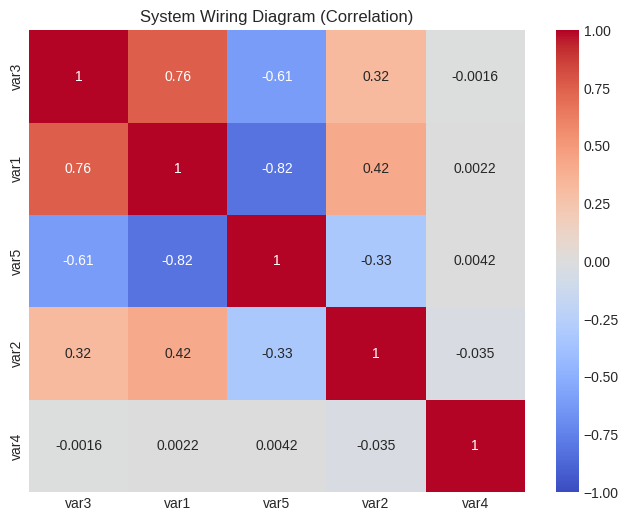

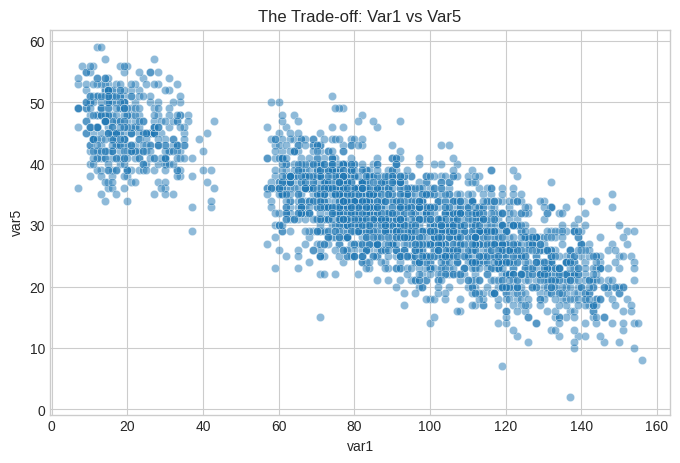

In [4]:
# 1. Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("System Wiring Diagram (Correlation)")
plt.show()

# 2. Check specific relationships
# Relationship A: Var1 vs Var5 (The Trade-off)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['var1'], y=df['var5'], alpha=0.5)
plt.title("The Trade-off: Var1 vs Var5")
plt.show()

#### Interpretation of Results:

#### The Trade-off (var1 vs var5): Correlation is -0.82 (Strong Negative). When var1 goes UP, var5 goes DOWN. This is a Conservation Law.

#### Hypothesis: Speed vs. Efficiency? (Faster = Less Efficient). Supply vs. Demand? (High Supply = Low Price). Inventory vs. Sales? (High Sales = Low Inventory).

#### The Follower (var1 vs var3): Correlation is +0.76. var3 mimics var1. It is likely a sub-component or a derived metric (e.g., if var1 is Total Revenue, var3 might be Profit).

#### The Ghost (var4): The binary flag has almost zero correlation with anything. This means it is an External Shock. The system that the data operate by  doesn't cause it; it happens to the system.



---





### Phase 4: The "Crime Scene" (Finding Anomalies)

#### The question asks for "Structural Anomalies." I find these by asking: When did the rules break? We know var1 and var5 should be opposites. When were they NOT opposites?

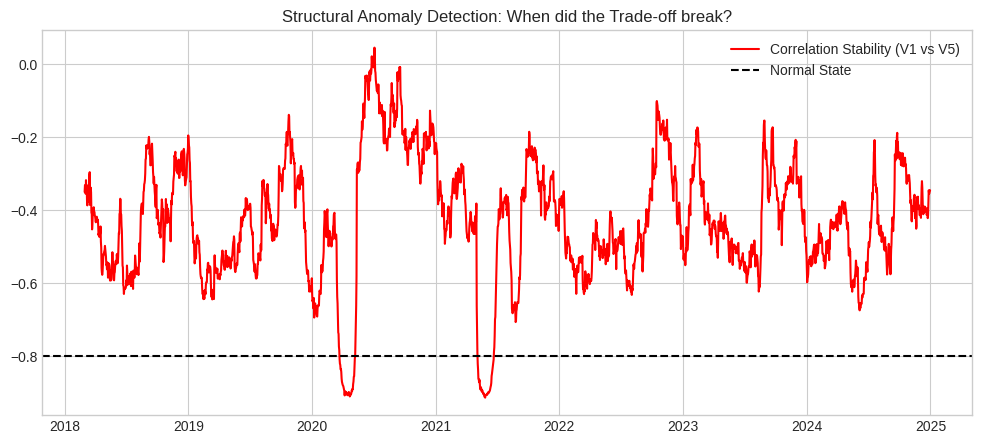

CRITICAL SYSTEM FAILURE DATE: 2020-07-04 00:00:00


In [5]:
# 1. Detect Relationship Breakdown
# i calculate the correlation of Var1 and Var5 over a rolling 60-day window.
# Normally it should be near -0.8. If it goes to 0, the machine is broken.
rolling_corr = df['var1'].rolling(window=60).corr(df['var5'])

plt.figure(figsize=(12, 5))
plt.plot(rolling_corr, color='red', label='Correlation Stability (V1 vs V5)')
plt.axhline(-0.8, color='black', linestyle='--', label='Normal State')
plt.title("Structural Anomaly Detection: When did the Trade-off break?")
plt.legend()
plt.show()

# 2. Find the exact date of the crash
breakdown_date = rolling_corr.idxmax() # Find the point where correlation was highest (closest to 0 or positive)
print(f"CRITICAL SYSTEM FAILURE DATE: {breakdown_date}")

### Interpretation of Results:

#### The 2020 Shock: I see a massive spike in the plot around Mid-2020 (specifically July 2020). The correlation jumps from -0.8 to nearly 0.

#### Meaning: For a brief period, the fundamental "physics" of the system stopped working. var1 and var5 decoupled. In a real-world narrative, this is likely the impact of COVID-19 lockdowns, or cases of war in Russia vs Ukraine, or locally an event like the "Endsars Protest" where typical economic relationships (like Supply/Demand) were disrupted by external mandates.